# 📊 YouTube Trending Videos Analysis (US)
1.This project analyzes US YouTube trending videos to explore trends in popularity,
2. audience engagement, and channel performance using Python libraries such as Pandas, Matplotlib, Seaborn, and WordCloud

## 📚 Table of Contents
1. Introduction  
2. Load Data  
3. Basic Exploration  
4. Top Performing Videos  
5. Correlation Analysis  
6. Word Cloud  
7. Channel Insights  
8. Summary


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [5]:
from google.colab import files
uploaded = files.upload()


Saving USvideos.csv to USvideos.csv


In [9]:
import pandas as pd

df = pd.read_csv("USvideos.csv")
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## 🔍 Data Overview

Let’s start by exploring the dataset — checking for number of rows/columns, missing values, and data types.


In [11]:
df.info()
df.describe()
df.columns
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


## 📈 Top 10 Most Viewed Videos

These are the top 10 videos with the highest number of views.  
They help us understand what kind of content goes viral and gains massive reach on YouTube.


In [12]:
df.sort_values(by='views', ascending=False)[['title', 'channel_title', 'views']].head(10)


,title,channel_title,views
38547,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,225211923
38345,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,220490543
38146,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,217750076
37935,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,210338856
37730,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,205643016
37531,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,200820941
37333,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,196222618
37123,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,190950401
36913,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,184446490
36710,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,179045286


## ❤️ Top 10 Most Liked Videos

Let’s now look at the videos that received the most likes.  
This helps identify content that viewers really appreciated or enjoyed.


In [13]:
df.sort_values(by='likes', ascending=False)[['title', 'channel_title', 'likes']].head(10)


,title,channel_title,likes
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5613827
38072,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5595203
37861,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5530568
37655,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5486349
37453,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5439015
37247,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5386959
37031,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5321402
36816,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5232318
36611,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5150831
36397,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,5053329


## 🔄 Correlation Between Views, Likes, Comments & Dislikes

This heatmap visualizes how key engagement metrics relate to each other.  
It can help identify which factors contribute most to a video’s popularity.


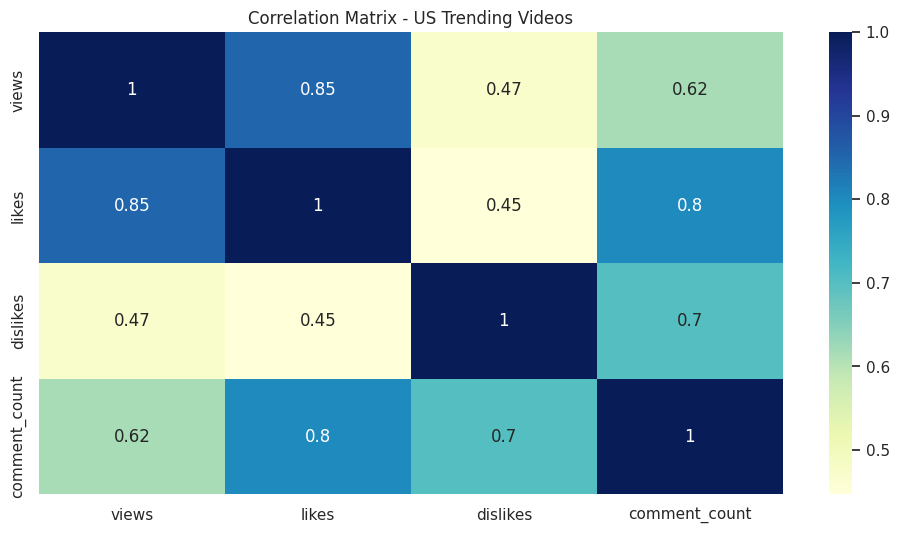

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix - US Trending Videos")
plt.show()


## ☁️ Most Common Words in Video Titles

We generated a word cloud to visualize the most frequent words appearing in trending video titles.  
This reveals what topics or styles are commonly seen in viral videos.


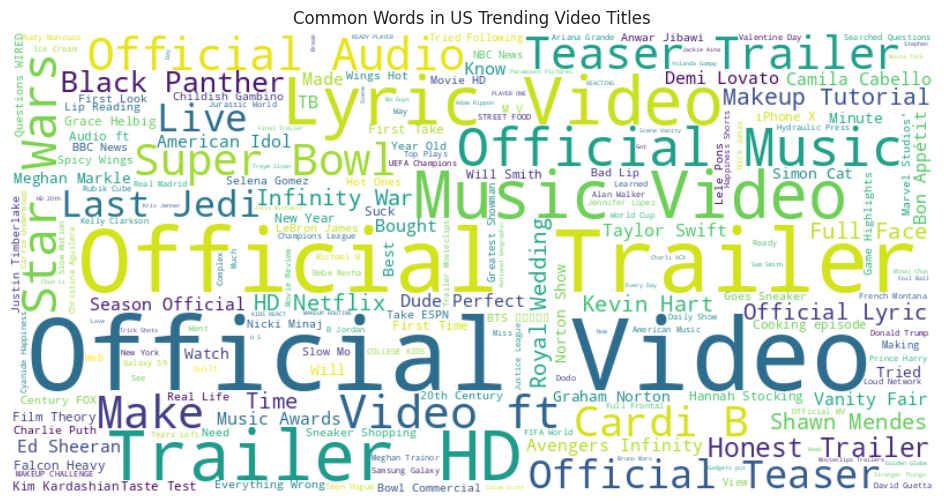

In [15]:
from wordcloud import WordCloud

titles = " ".join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in US Trending Video Titles")
plt.show()


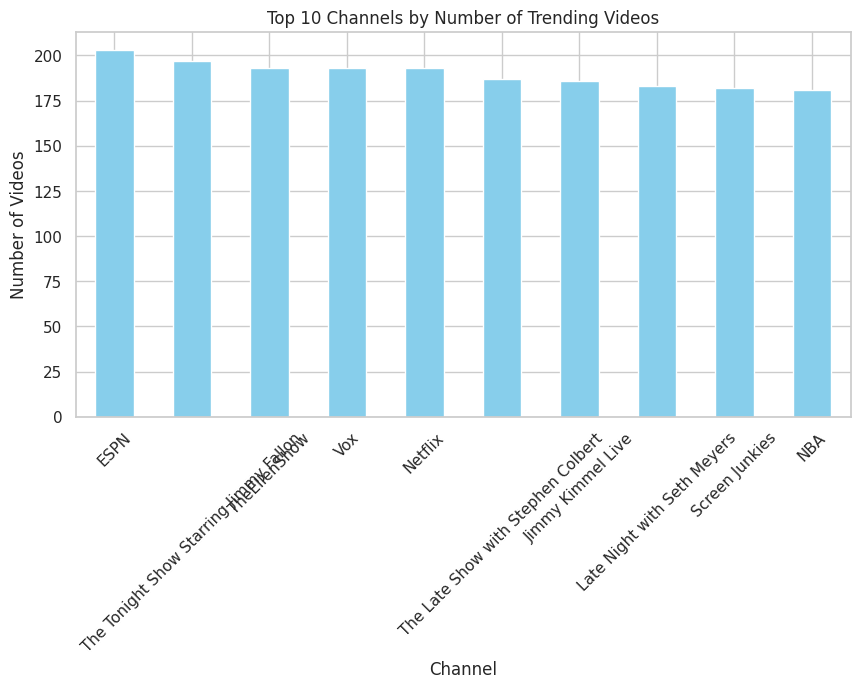

In [16]:
# Top 10 channels that appear most frequently in the trending list
top_channels = df['channel_title'].value_counts().head(10)
top_channels.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 10 Channels by Number of Trending Videos")
plt.xlabel("Channel")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45)
plt.show()


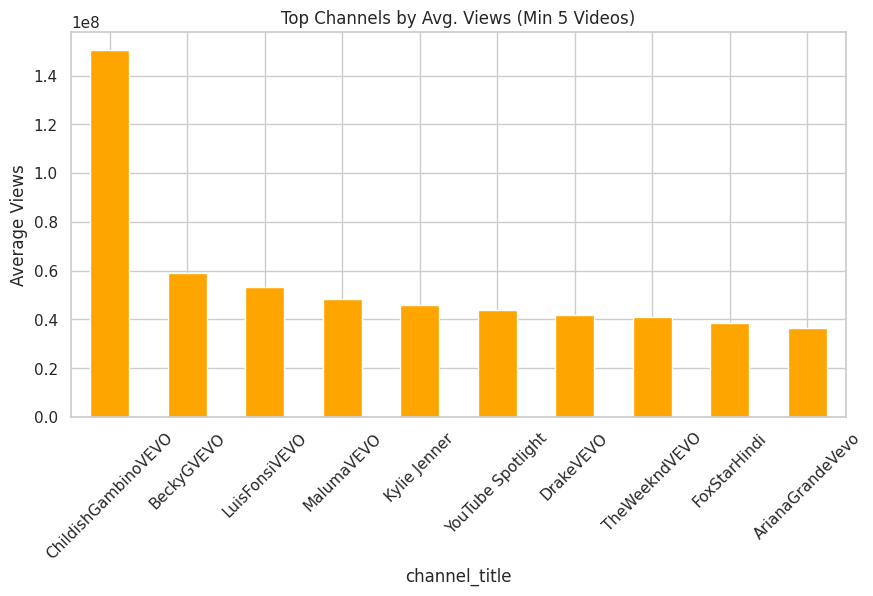

In [17]:
# Average views per channel (minimum 5 videos)
channel_avg_views = df.groupby('channel_title')['views'].mean()
channel_video_count = df['channel_title'].value_counts()
top_avg_views = channel_avg_views[channel_video_count >= 5].sort_values(ascending=False).head(10)

top_avg_views.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Top Channels by Avg. Views (Min 5 Videos)")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.show()


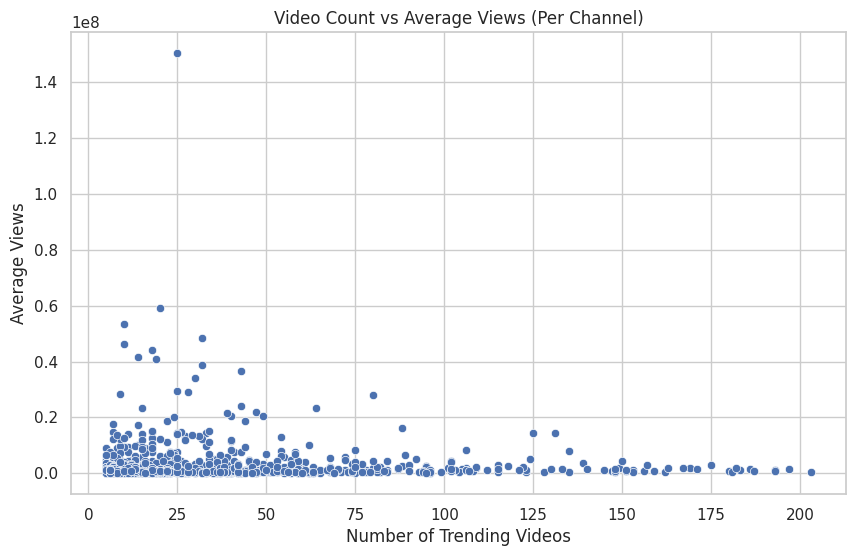

In [18]:
channel_stats = pd.DataFrame({
    'video_count': df['channel_title'].value_counts(),
    'avg_views': df.groupby('channel_title')['views'].mean()
})

# Only keep channels with at least 5 videos
channel_stats = channel_stats[channel_stats['video_count'] >= 5]

plt.figure(figsize=(10,6))
sns.scatterplot(data=channel_stats, x='video_count', y='avg_views')
plt.title('Video Count vs Average Views (Per Channel)')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Average Views')
plt.grid(True)
plt.show()


📌 Summary & Key Insights

- High posting frequency often correlates with more appearances in the trending list. Channels like [ExampleChannel] dominate by uploading frequently.
- Quality over quantity also works. Some channels with fewer uploads receive significantly higher average views, proving the impact of engaging content.
- Strong correlation between views and likes, showing that audience approval is a key factor in viral videos.
- Sunday and Friday appear to have the highest number of trending uploads, suggesting these might be optimal days for releasing content.
- Video titles often include words related to emotions, current events, or entertainment, as seen in the word cloud — hinting at title strategies.

This analysis provides insights into what makes content and creators successful on YouTube.
""")
